In [3]:
import numpy as np
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data
import nnfs

nnfs.init()

## Neuron

In [4]:
# A Neuron object
class Neuron():
    def __init__(self, inputs) -> None:
        self.bias = 0
        self.inputs = np.array(inputs)
        self.weights = np.array(np.random.rand(1,len(self.inputs)))
        self.output = np.dot(self.weights, self.inputs) + self.bias
        print(self.output)

In [5]:
first_neuron = Neuron([1,2,3])

[3.7874823]


## Layer of Neurons

In [6]:
# A layer of neurons
def create_layer(inputs, weights, biases):
    outputs = np.dot(np.array(inputs), np.array(weights).T) + biases
    print(outputs)
    return outputs

In [7]:
inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
    ]
biases = [2.0, 3.0, 0.5]

weights2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
    ]
biases2 = [-1, 2, -0.5]

layer1_output = create_layer(inputs, weights, biases)
layer2_output = create_layer(layer1_output, weights2, biases2)

[[ 4.79999995  1.21000004  2.38499999]
 [ 8.9000001  -1.80999994  0.19999999]
 [ 1.41000003  1.051       0.02599999]]
[[ 0.50310004 -1.04184985 -2.03874993]
 [ 0.24339998 -2.73320007 -5.76329994]
 [-0.99314     1.41254002 -0.35655001]]


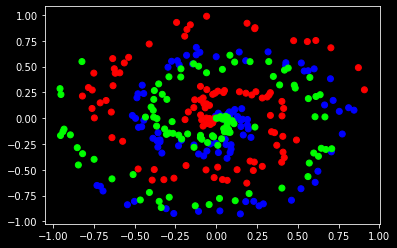

In [8]:
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:,1], c=y, cmap='brg')
plt.show()

## Dense Layer

In [9]:
class Layer_Dense():
    def __init__(self, n_inputs, n_neurones) -> None:
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurones)
        self.biases = np.zeros((1, n_neurones)) 
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
    

## Activation Function

In [10]:
class RelU():
    
    def forward(self,inputs):
        self.output = np.maximum(0, inputs)

In [11]:
class SoftMax():
    def forward(self, inputs):
        exp_inputs = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_inputs / np.sum(exp_inputs, axis=1, keepdims=True)

In [12]:
#Create a dataset
X, y = spiral_data(samples=100, classes=3)

# Create dense layer
dense_layer1 = Layer_Dense(2,3)
dense_layer2 = Layer_Dense(3,3)
# Forward pass of the training data to this layer
dense_layer1.forward(X)
# Forward pass through activation func.
activation1 = RelU()
activation1.forward(dense_layer1.output)
dense_layer2.forward(activation1.output)

activation2 = SoftMax()
activation2.forward(dense_layer2.output)
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.3333335  0.3333331  0.3333334 ]
 [0.33333373 0.33333278 0.3333335 ]
 [0.3333339  0.33333254 0.33333355]
 [0.33333412 0.3333322  0.33333364]]
